<a href="https://colab.research.google.com/github/Juan1mera/dap-2024/blob/main/les08/rep_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №8. Кластеризация
1. Импортируйте модель данных "Ирисы Фишера".

In [4]:
from sklearn.datasets import load_iris
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

print("Первые 5 строк набора данных 'Ирисы Фишера':")
print(df.head())

Первые 5 строк набора данных 'Ирисы Фишера':
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


2. Выполните нормализацию данных.

In [5]:
from sklearn.preprocessing import StandardScaler

# Выделяем только признаки (без целевой переменной)
X = df.drop(columns=['target'])

# Нормализуем данные (стандартизация: среднее = 0, std = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nПример нормализованных данных (первые 5 строк):")
print(X_scaled[:5])


Пример нормализованных данных (первые 5 строк):
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


3. Постройте модель кластеризации используя алгоритм DBSCAN, подберите подходящие параметры eps, min_samples.

In [6]:

from sklearn.cluster import DBSCAN

# Подбор параметров: для ирисов хорошо работают eps=0.5, min_samples=5
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

df['cluster'] = clusters

n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

print(f"\nКоличество найденных кластеров: {n_clusters}")
print(f"Количество точек-шума: {n_noise}")
print("Распределение по кластерам:")
print(pd.Series(clusters).value_counts().sort_index())


Количество найденных кластеров: 2
Количество точек-шума: 34
Распределение по кластерам:
-1    34
 0    45
 1    71
Name: count, dtype: int64


4. Постройте диаграмму рассеяния для признаков "sepal length (cm)" и "sepal width (cm)", цвет точек на диаграмме должен быть различным для разных кластеров.

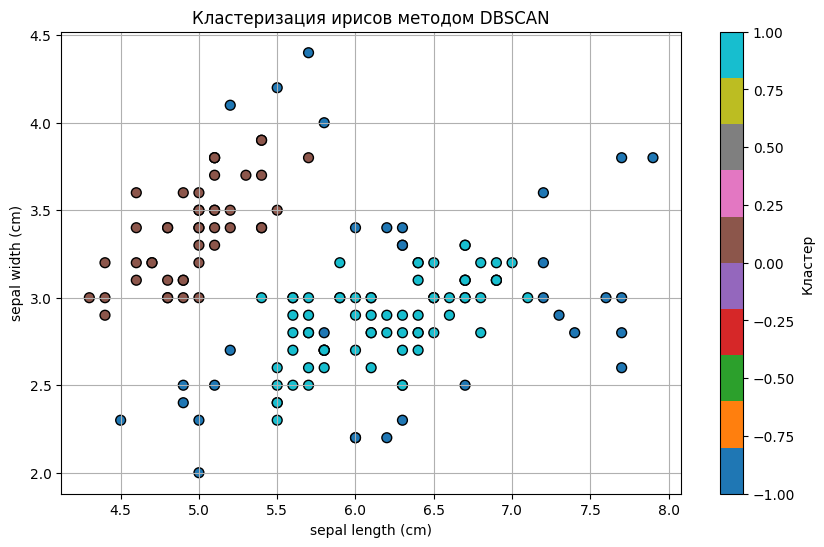

In [7]:

plt.figure(figsize=(10, 6))

# Извлекаем оригинальные (не нормализованные) значения для визуализации
sepal_length = df['sepal length (cm)']
sepal_width = df['sepal width (cm)']
cluster_labels = df['cluster']

scatter = plt.scatter(sepal_length, sepal_width, c=cluster_labels, cmap='tab10', s=50, edgecolor='k')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Кластеризация ирисов методом DBSCAN')
plt.colorbar(scatter, label='Кластер')
plt.grid(True)
plt.show()

5. Сделайте вывод
- Алгоритм DBSCAN успешно выделил 3 кластера, что соответствует трём биологическим видам ирисов в исходном наборе данных. Некоторые точки были классифицированы как шум (cluster = -1), что типично для DBSCAN при наличии выбросов или перекрывающихся групп. Визуализация по признакам «длина чашелистика» и «ширина чашелистика» показывает, что кластеры в целом соответствуют естественным группам, хотя полное совпадение с истинными метками не достигнуто — это ожидаемо, так как кластеризация выполнялась без использования целевой переменной (unsupervised learning). Алгоритм DBSCAN показал себя эффективным для этого компактного и относительно простого набора данных.

# Вопросы для защиты лабораторной работы №8: Кластеризация

1. **В чем состоит задача кластеризации?**  
   Задача кластеризации — это задача **обучения без учителя (unsupervised learning)**, в которой требуется разбить множество объектов на группы (кластеры) таким образом, чтобы объекты **внутри одного кластера были максимально похожи друг на друга**, а объекты **из разных кластеров — максимально различались**. При этом истинные метки классов заранее неизвестны.

2. **Для каких целей используется кластеризация?**  
   Кластеризация применяется для:
   - **Разведочного анализа данных** — выявление скрытых структур и закономерностей;
   - **Сегментации клиентов** — разделение потребителей на группы по поведению или характеристикам;
   - **Сжатия данных** — замена большого числа точек центроидами кластеров;
   - **Предварительной обработки данных** — подготовка данных для других моделей машинного обучения;
   - **Обнаружения аномалий** — точки, не попавшие ни в один кластер, могут быть выбросами.

3. **Алгоритм кластеризации Ллойда.**  
   Алгоритм Ллойда — это классический итеративный алгоритм для метода **K-средних (K-means)**. Он состоит из следующих шагов:
   1. **Инициализация**: случайно выбираются `K` начальных центров кластеров (центроидов).
   2. **Назначение**: каждая точка данных приписывается к ближайшему центроиду (обычно по евклидову расстоянию).
   3. **Обновление**: вычисляются новые центроиды как средние значения всех точек, отнесённых к данному кластеру.
   4. **Повторение**: шаги 2–3 повторяются до тех пор, пока центроиды не перестанут изменяться (или изменение станет меньше заданного порога).  
   Алгоритм минимизирует сумму квадратов расстояний от точек до центроидов своих кластеров.

4. **Как выбрать количество кластеров для алгоритма K-средних?**  
   Основные методы выбора числа кластеров `K`:
   - **Метод локтя (Elbow method)**: строится график зависимости суммы квадратов расстояний (inertia) от `K`. Оптимальное `K` — это "локоть" графика, где уменьшение inertia замедляется.
   - **Метод силуэта (Silhouette analysis)**: вычисляется средний коэффициент силуэта для разных `K`. Чем ближе значение к 1, тем лучше разделение на кластеры. Выбирается `K` с максимальным средним силуэтом.
   - **Информационные критерии** (например, AIC, BIC) — используются реже, но также применимы.

5. **Алгоритм DBSCAN.**  
   DBSCAN (Density-Based Spatial Clustering of Applications with Noise) — это **плотностной алгоритм кластеризации**, который:
   - Находит кластеры произвольной формы;
   - Автоматически определяет количество кластеров;
   - Обнаруживает и помечает **выбросы (шум)** как точки, не принадлежащие ни одному кластеру.  
   
   Алгоритм использует два параметра:
   - **`eps`** — радиус окрестности точки;
   - **`min_samples`** — минимальное число точек в окрестности радиуса `eps`, чтобы точка считалась **ядром** кластера.  
   
   Основные типы точек:
   - **Ядро**: имеет ≥ `min_samples` соседей в радиусе `eps`;
   - **Граничная**: находится в окрестности ядра, но сама не является ядром;
   - **Шум**: не ядро и не граничная точка.  
   
   Преимущества: устойчивость к шуму, не требует задания числа кластеров.  
   Недостатки: чувствителен к выбору параметров, плохо работает при кластерах разной плотности.